# Should we classify sectors at sentence or text block level? 


In [1]:
import sys

!{sys.executable} -m pip install argilla


[notice] A new release of pip is available: 23.0 -> 23.1.1
[notice] To update, run: python -m pip install --upgrade pip


In [1]:
import os
import random

from cpr_data_access.models import Dataset, BaseDocument
from dotenv import load_dotenv, find_dotenv
import argilla as rg
from tqdm.auto import tqdm
import spacy
import numpy as np

load_dotenv(find_dotenv(), override=True)
nlp = spacy.load("en_core_web_sm")

/Users/kalyan/Library/Caches/pypoetry/virtualenvs/experiment-template-Q6O6vM4r-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Config

DATASET_NAME = "sectors-sentence-or-text-block"

In [3]:
# User management is done at a workspace level
rg.init(
    workspace="gst",
    api_key=os.environ["ARGILLA_API_KEY"],
)

dataset = rg.load(DATASET_NAME).to_datasets()

dataset_df = dataset.to_pandas()
dataset_df["sentence_or_text_block"] = dataset_df["metadata"].apply(
    lambda i: i["sentence_or_text_block"]
)

dataset_df_annotated = dataset_df[~dataset_df["annotation"].isin([None, "none"])]
dataset_df_annotated["num_labels"] = dataset_df_annotated["annotation"].apply(len)

/var/folders/nt/2c78pgv94312v7_mmz24h6kc0000gn/T/ipykernel_39879/1094829514.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df_annotated["num_labels"] = dataset_df_annotated["annotation"].apply(len)


## 1. number of sector assignments

,count,mean,std,min,25%,50%,75%,max
sentence_or_text_block,,,,,,,,
sentence,211.0,0.383886,0.774305,0.0,0.0,0.0,1.0,5.0
text_block,193.0,0.502591,0.884616,0.0,0.0,0.0,1.0,5.0


array([<Axes: title={'center': 'sentence'}, ylabel='Frequency'>,
       <Axes: title={'center': 'text_block'}, ylabel='Frequency'>],
      dtype=object)

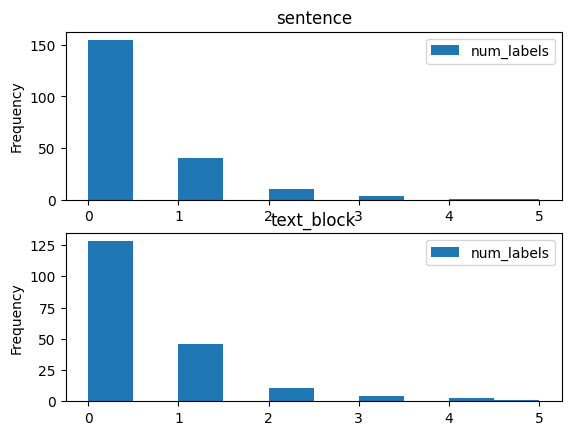

In [11]:
stats = dataset_df_annotated.groupby("sentence_or_text_block")["num_labels"]
display(stats.describe())

dataset_df_annotated[["sentence_or_text_block", "num_labels"]].plot(
    by="sentence_or_text_block", kind="hist"
)

## 2. average length (number of characters)

In [5]:
dataset_df_annotated["text_length"] = dataset_df_annotated["text"].apply(len)

/var/folders/nt/2c78pgv94312v7_mmz24h6kc0000gn/T/ipykernel_39879/1012444833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df_annotated['text_length'] = dataset_df_annotated['text'].apply(len)


,count,mean,std,min,25%,50%,75%,max
sentence_or_text_block,,,,,,,,
sentence,211.0,105.786730,93.222402,1.0,26.0,81.0,164.5,550.0
text_block,193.0,250.854922,276.341915,2.0,42.0,125.0,423.0,1228.0


array([<Axes: title={'center': 'sentence'}, ylabel='Frequency'>,
       <Axes: title={'center': 'text_block'}, ylabel='Frequency'>],
      dtype=object)

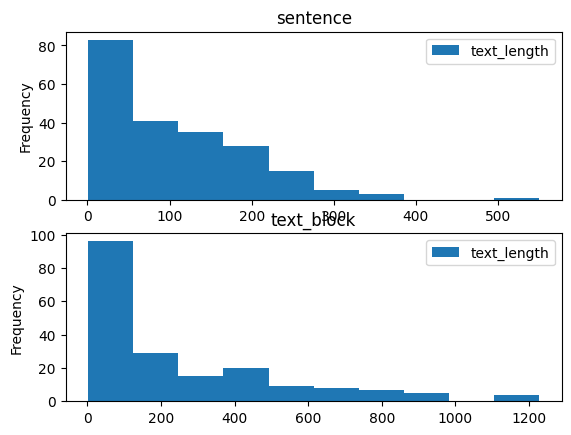

In [7]:
stats = dataset_df_annotated.groupby("sentence_or_text_block")["text_length"]
display(stats.describe())

dataset_df_annotated[["sentence_or_text_block", "text_length"]].plot(
    by="sentence_or_text_block", kind="hist"
)